Minimum Mean Square Error 0.6494495844086484
Index of Minimum Mean Square Error 285


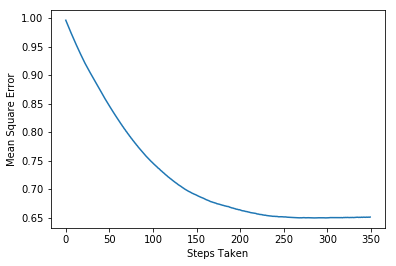

In [9]:
import numpy as np
from urllib.request import urlopen
from math import sqrt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

data = urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        line = line.decode('utf-8')
        names = line.strip().split(";")
        firstLine = False
    else:
        
        line = line.decode('utf-8')
        row = line.strip().split(";")
        labels.append(float(row[-1]))
        row.pop()
        floatrow = [float(num) for num in row]
        xList.append(floatrow)
        
# calculate mean and variance in each column
nrows = len(xList)
ncols = len(xList[0])

xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] -mean) for j in range(nrows)]
    sumsq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumsq/nrows)
    xSD.append(stdDev)
# normalize the dataset
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)
    
# normalized the labels
meanLabel = sum(labels)/(nrows)
sdLabel = sqrt(sum([(labels[i] - meanLabel)*(labels[i]-meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]


# Build cross-validation sets
nxval = 10

nsteps=350
stepSize = 0.004

# initialize list for storing errors
errors = []
cvCurve = []
for i in range(nsteps):
    b = []
    errors.append(b)

for ixval in range(nxval):
    idxTest = [a for a in range(nrows) if a%nxval == ixval]
    idxTrain = [a for a in range(nrows) if a%nxval != ixval]
    
    xTrain = [xNormalized[r] for r in idxTrain]
    xTest = [xNormalized[r] for r in idxTest]
    labelTrain = [labelNormalized[r] for r in idxTrain]
    labelTest = [labelNormalized[r] for r in idxTest]
    
    nrowsTrain = len(idxTrain)
    nrowsTest = len(idxTest)
    
    # initialize vector of coefficients beta and matrix of betas at each step
    beta = [0.0]* ncols
    betaMat = []
    betaMat.append(list(beta))
    

    for iStep in range(nsteps):
        residuals = [0.0]* nrows
        for j in range(nrowsTrain):
            labelsHat = sum([xTrain[j][k]*beta[k] for k in range(ncols)])
            residuals[j] = labelTrain[j] - labelsHat
        
        # correlation between feature columns
        corr = [0.0]*ncols
        for j in range(ncols):
            corr[j] = sum([xTrain[k][j] * residuals[k] for k in range(nrowsTrain)])/nrowsTrain
        
        iStar = 0
        corrStar = corr[0]
        for j in range(1,(ncols)):
            if abs(corrStar) < abs(corr[j]):
                iStar = j
                corrStar = corr[j]
        beta[iStar] += stepSize * corrStar /abs(corrStar)
        betaMat.append(list(beta))
        
        for j in range(nrowsTest):
            labelsHat = sum([xTest[j][k]*beta[k] for k in range(ncols)])
            err = labelTest[j] - labelsHat
            errors[iStep].append(err)

for errVect in errors:   
    mse = sum([x*x for x in errVect])/len(errVect)
    cvCurve.append(mse)

minMse = min(cvCurve)
minPt = [i for i in range(len(cvCurve)) if cvCurve[i] == minMse][0]
print("Minimum Mean Square Error",minMse)
print("Index of Minimum Mean Square Error",minPt)

xaxis = range(len(cvCurve))
plt.plot(xaxis,cvCurve)

plt.xlabel("Steps Taken")
plt.ylabel("Mean Square Error")
plt.show()
